In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def MRprobRead(directory): # reads the datafile in directory
    firstColumn = []
    secondColumn = []
    thirdColumn = []
    with open(directory) as f:
    ##reads the neutron stars mass-radius-probability data files in a given directory.
        for i in range(6):
            next(f)
        for line in f:
            this_line = line.split()
            if this_line[0] =="!":
                continue
            firstColumn.append(float(this_line[0]))
            secondColumn.append(float(this_line[1]))
            thirdColumn.append(float(this_line[2]))
    name = (directory)[8:-4]
    return firstColumn, secondColumn, thirdColumn, name 

def convertProb(Prob,n_radius,n_mass):
    Prob2d = np.reshape(Prob,(n_radius,n_mass))
    Prob2d = np.transpose(Prob2d)
    Prob2d = Prob2d/ np.sum(Prob2d)
    print(np.sum(Prob2d))
    return Prob2d
    
# def MaxProb(Radius,Mass,Prob):
#     maxProbInd = np.argmax(Prob)
#     maxRadius = Radius[maxProbInd]
#     maxMass = Mass[maxProbInd]
#     return maxRadius, maxMass   

def MassRadius(datafile,type): #returns mass,radius,prob2d for each data file
        firstColumn,secondColumn,thirdColumn,name = MRprobRead("MRprob2"+"/"+datafile)
        
        if type==1:
                # maxRadius, maxMass  = MaxProb(secondColumn, firstColumn, thirdColumn)
                Radius = np.asarray(np.sort(list(set(secondColumn))))
                n_radius = len(Radius)
                Mass = np.asarray(firstColumn[:n_radius])
                n_mass = len(Mass)
                Prob = np.asarray(thirdColumn)
                
        elif type==2:
                # maxRadius, maxMass  = MaxProb(firstColumn, secondColumn, thirdColumn)
                Radius = np.asarray(np.sort(list(set(firstColumn))))
                n_radius = 51
                Mass = np.asarray(secondColumn[:51])
                n_mass = 51
                Prob = np.asarray(thirdColumn)
        Prob2D = convertProb(Prob,n_radius,n_mass)
        return Radius,Mass,Prob2D,name

def contourplot(datafile,type): ## plots the datafile
    Radius, Mass, Prob2D, name = MassRadius(datafile,type)
    plt.figure()
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(11, 10)
    plt.xlabel ("Radius (km)",fontsize=20)
    plt.ylabel(r"$M_{ADM} / M_{sun}$",fontsize=20)
    plt.title(name)
    cs = plt.contourf(Radius, Mass, Prob2D,cmap ='cividis')
    bar = plt.colorbar(cs)


MRprob_1608.dat
1.0


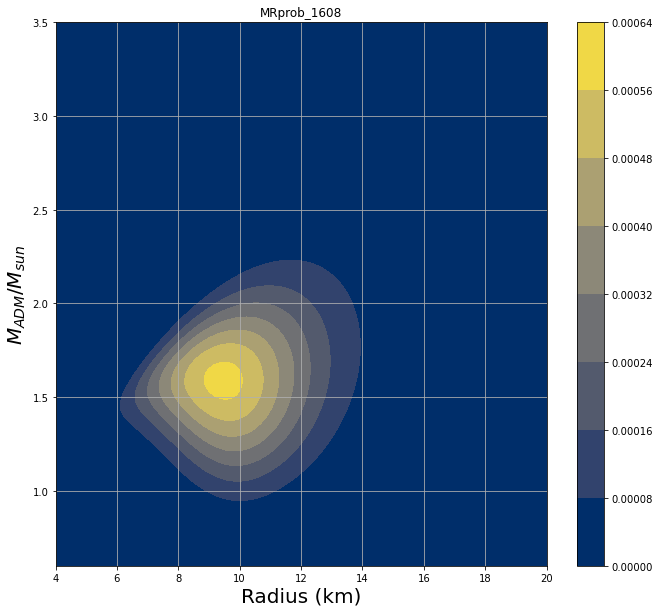

In [17]:

datafiles1= ["MRprob_1608.dat"] 
# "MRprob_1724.dat","MRprob_1731.dat", "MRprob_1745.dat", "MRprob_1748.dat", "MRprob_1820.dat"]
# datafiles2 = ["MRprob_M13.dat", "MRprob_M28.dat", "MRprob_M30.dat" , "MRprob_NGC6304.dat", "MRprob_NGC6397.dat","MRprob_OmCen.dat" ,"MRprob_X5.dat","MRprob_X7.dat"]
 

for datafile in datafiles1:
    print(datafile)
    contourplot(datafile,1)
# for datafile in datafiles2:
#     contourplot(datafile,2)
#     print(datafile)

# f = open("maxProbs.txt", "w")
# f.writelines("Radius   Mass \n")
# for datafile in datafiles1:
#     Radius,Mass,Prob2D,name,maxRadius, maxMass = MassRadius(datafile,1)
#     print("for" + datafile+" maxMass: "+ str(maxMass) + " maxRadius: "+ str(maxRadius))
#     f.writelines(str(maxRadius)+" "+ str(maxMass)+"\n")
# for datafile in datafiles2:
#     Radius,Mass,Prob2D,name,maxRadius, maxMass = MassRadius(datafile,2)
#     print("for" + datafile+" maxMass: "+ str(maxMass) + " maxRadius: "+ str(maxRadius))
#     f.writelines(str(maxRadius)+" "+ str(maxMass)+"\n")
# f.close()
